<a href="https://colab.research.google.com/github/np03cs4a240162-alina/W7_OODP/blob/main/240162_AlinaManandhar.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np


1. Extract Latest Year:
• Identify unique years in the dataset.
• Filter the dataset to include only observations from the year 2022.
• Save the filtered dataframe as hdi 2022 df (used for all subsequent tasks in Problem 1A).


In [ ]:

#identify unique years in the dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Human_Development_Index_Dataset.csv",
    encoding="latin1"
)

df['year'].unique()


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

To demonstrate the replacement and check for the presence of '–' before and after, we'll create a temporary DataFrame from the original `df`.

In [ ]:
# Create a temporary DataFrame to demonstrate the replacement
hdi_2022_df_demonstration = df[df['year'] == 2022].reset_index(drop=True)

# Check for the presence of '–' before replacement
initial_occurrences = (hdi_2022_df_demonstration.astype(str) == '–').sum().sum()

if initial_occurrences > 0:
    print(f"Found {initial_occurrences} instances of '–' before replacement.")
    print("Rows containing '–' before replacement (first 5):")
    # Display rows that contain '–' for demonstration
    mask_contains_dash = hdi_2022_df_demonstration.astype(str).apply(lambda x: x.str.contains('–')).any(axis=1)
    display(hdi_2022_df_demonstration[mask_contains_dash].head())

    # Perform the replacement
    hdi_2022_df_demonstration.replace("–", np.nan, inplace=True)

    # Check for the presence of '–' after replacement
    final_occurrences = (hdi_2022_df_demonstration.astype(str) == '–').sum().sum()

    if final_occurrences == 0 and initial_occurrences > 0:
        print(f"Successfully replaced {initial_occurrences} instances of '–' with NaN.")
        print("Sample of affected rows after replacement (first 5, where '–' was found):")
        # Display rows that previously contained '–' to show the effect of replacement
        display(hdi_2022_df_demonstration[mask_contains_dash].head())
    elif final_occurrences > 0:
        print(f"Warning: Not all '–' characters were replaced. Still {final_occurrences} instances remaining.")
else:
    print("No '–' characters were found in the dataset to replace.")


In [ ]:
#Filter dataset for year 2022
hdi_2022_df = df[df['year'] == 2022]

In [ ]:
hdi_2022_df = hdi_2022_df.reset_index(drop=True)


QUESTION 2

In [ ]:
#Data Exploration:
hdi_2022_df.head(10)


In [ ]:
#Count rows and columns
hdi_2022_df.shape


In [ ]:
#Column names and data types
hdi_2022_df.dtypes

In [ ]:
#Question 3: Missing Values & Data Cleaning
# Check missing values
hdi_2022_df.isnull().sum()

In [ ]:
#Inspect numeric columns stored as text
hdi_2022_df.info()

In [ ]:
#Replace special characters (e.g. “–”) with NaN
hdi_2022_df.replace("–", np.nan, inplace=True)

In [ ]:
#Convert numeric columns properly
hdi_2022_df['hdi'] = pd.to_numeric(hdi_2022_df['hdi'], errors='coerce')

hdi_2022_df['gross_inc_percap'] = pd.to_numeric(
    hdi_2022_df['gross_inc_percap'],
    errors='coerce'
)


In [ ]:
#Remove duplicates
hdi_2022_df.drop_duplicates(inplace=True)

In [ ]:
#handlingmissingdata
hdi_2022_df.dropna(subset=['hdi'], inplace=True)


In [ ]:
# Question 4: Basic Statistics (IMPORTANT) Mean, Median, Std of HDI
print(f"Mean of HDI: {hdi_2022_df['hdi'].mean()}")
print(f"Median of HDI: {hdi_2022_df['hdi'].median()}")
print(f"Standard Deviation of HDI: {hdi_2022_df['hdi'].std()}")

In [ ]:
#Highest HDI country
highest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmax()]
highest_hdi_country


In [ ]:
#Country with Lowest HDI
lowest_hdi_country = hdi_2022_df.loc[hdi_2022_df['hdi'].idxmin()]
lowest_hdi_country_name = lowest_hdi_country['country']
print(lowest_hdi_country_name)


In [ ]:
#QUESTION 5: Filtering & Sorting (FIXED) Filter HDI > 0.800
high_hdi_df = hdi_2022_df[hdi_2022_df['hdi'] > 0.800]
print(high_hdi_df)

In [ ]:
#Sort by GNI per Capita (Descending)
high_hdi_sorted = high_hdi_df.sort_values(
    by='gross_inc_percap',
    ascending=False
)
display(high_hdi_sorted)

In [ ]:
#top10 countries
high_hdi_sorted.head(10)


7.Adding HDI Category Column:
• Create a new column HDI Category that classifies each country into one of the four official
Human Development Index groups. The classification should be based on the HDI value for the
year 2022. Use the following categories and thresholds defined by the United Nations Development
Programme (UNDP):
HDI Category HDI Range (hdi)
Low < 0.550
Medium 0.550 – 0.699
High 0.700 – 0.799
Very ≥ 0.800
After creating this new column:
• verify that all countries are classified correctly,
• ensure the updated dataframe includes the new category column.
• Save the final dataframe as HDI category added.csv and include this file in your final
submission

In [ ]:
def hdi_category(hdi):
    if hdi < 0.550:
        return "Low"
    elif 0.550 <= hdi <= 0.699:
        return "Medium"
    elif 0.700 <= hdi <= 0.799:
        return "High"
    else:
        return "Very High"


In [ ]:
#Create New Column HDI Category
hdi_2022_df['HDI Category'] = hdi_2022_df['hdi'].apply(hdi_category)
print(hdi_2022_df)

In [ ]:
#Verify Correct Classification
hdi_2022_df['HDI Category'].value_counts()
print(hdi_2022_df)

In [ ]:
#Verify Correct Classification
print(hdi_2022_df['HDI Category'].value_counts())

In [ ]:
#saving final dataframe
hdi_2022_df.to_csv("HDI_category_added.csv", index=False)


In [ ]:
# Problem - 1B - HDI Visualization and Trend Analysis (2020 – 2022)
# Creating a separate copy ONLY for Problem 1B
df_1B = df.copy()

print("Independent dataframe created for Problem 1B")
print("Shape:", df_1B.shape)


In [ ]:
#Filter Years 2020–2022 (Problem 1B only)
df_1B = df_1B[df_1B["year"].isin([2020, 2021, 2022])]

print("Filtered years: 2020, 2021, 2022")
print("Shape after filtering:", df_1B.shape)

In [ ]:
#saving new filtered csv file
df_1B.to_csv("HDI_problem1B.csv", index=False)

print("File saved: HDI_problem1B.csv")


In [ ]:
#Check Missing Values (Essential Columns)
print("Missing values before cleaning (Problem 1B):")
print(df_1B[["hdi", "country", "year"]].isnull().sum())

In [ ]:
#Convert HDI to Numeric (Only for 1B)
df_1B["hdi"] = pd.to_numeric(df_1B["hdi"], errors="coerce")

print("HDI converted to numeric for Problem 1B")

In [ ]:
#Remove Duplicates (Problem 1B only)
before = df_1B.shape[0]
df_1B = df_1B.drop_duplicates()
after = df_1B.shape[0]

print("Duplicate rows removed:", before - after)

In [ ]:
#Handle Missing Essential Values
before = df_1B.shape[0]
df_1B = df_1B.dropna(subset=["hdi", "country", "year"])
after = df_1B.shape[0]

print("Rows dropped due to missing HDI:", before - after)


In [ ]:
#Verify Cleaning
print("Missing values after cleaning:")
print(df_1B[["hdi", "country", "year"]].isnull().sum())

In [ ]:
#Visualization Tasks:A. Line Chart — HDI Trend (Country-Level): Select any five countries (or five countries from a region of your choice). Plot
# HDI values for each country across the years 2020, 2021, and 2022.Ensure the chart includes appropriate axis labels, a legend, and an
# informative caption.


countries = ["Nepal", "India", "Norway", "United States", "Japan"]
df_countries = df_1B[df_1B["country"].isin(countries)]

print("Selected countries for HDI trend analysis:")
print(countries)


In [ ]:
import matplotlib.pyplot as plt

plt.figure()

for country in countries:
    data = df_countries[df_countries["country"] == country]
    plt.plot(data["year"], data["hdi"], marker="o", label=country)

plt.title("HDI Trend for Selected Countries (2020-2022)")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.legend()
plt.grid(True)
plt.show()

print("HDI trend line chart plotted.")

In [ ]:
#3B-1: Bar Chart – Average HDI by Region (2020–2022)
region_column = None
for col in df_1B.columns:
    if "region" in col.lower():
        region_column = col
        break

print("Detected region column:", region_column)

In [ ]:
#Result & Justification
if region_column is None:
    print("Region variable not available in the dataset.")

The dataset does not contain a region-level variable. Therefore, it is not possible to compute or visualize average HDI by region without introducing external assumptions. To avoid misleading or unmotivated visualizations, this chart was intentionally not generated.

In [ ]:
#3B-2: Box Plot – HDI Distribution (2020, 2021, 2022)
#3B-2.1 Data Already Filtered

#(The dataset df_1B already contains only 2020–2022.)

#3B-2.2 Box Plot Code
import matplotlib.pyplot as plt

plt.figure()
df_1B.boxplot(column="hdi", by="year")
plt.xlabel("Year")
plt.ylabel("HDI")
plt.title("HDI Distribution for 2020–2022")
plt.suptitle("")
plt.show()

print("Box plot generated successfully.")



The box plot shows that HDI distributions vary slightly across the three years.
The year 2020 exhibits greater variability, likely reflecting uneven impacts of the COVID-19 pandemic.
A gradual stabilization and slight upward shift in median HDI is observed in 2021 and 2022, indicating partial recovery.

In [ ]:
#Scatter Plot – HDI vs GNI per Capita
#3B-3.1 Check Availability of GNI Column
if "gni_per_capita" in df_1B.columns:
    print("GNI per Capita variable available.")
else:
    print("GNI per Capita variable not available in the dataset.")

In [ ]:
#4: Short Analysis Questions
#4.1 Countries with Greatest HDI Improvement (2020–2022)

pivot = df_1B.pivot_table(index="country", columns="year", values="hdi")
pivot["change_2020_2022"] = pivot[2022] - pivot[2020]

top_improvement = pivot.sort_values("change_2020_2022", ascending=False).head()

print("Countries with greatest HDI improvement (2020–2022):")
print(top_improvement[["change_2020_2022"]])

Interpretation

Countries such as Andorra, Azerbaijan, and Ecuador show the greatest improvement in HDI between 2020 and 2022. This improvement may be attributed to post-pandemic economic recovery, healthcare improvements, and increased investment in education and social protection systems.

In [ ]:
#Countries with HDI Decline
pivot = df_1B.pivot_table(index="country", columns="year", values="hdi")

# Identify decline between consecutive years
pivot["decline_2020_2021"] = pivot[2021] < pivot[2020]
pivot["decline_2021_2022"] = pivot[2022] < pivot[2021]

decline_countries = pivot[
    (pivot["decline_2020_2021"]) | (pivot["decline_2021_2022"])
]

print("Countries with HDI decline in at least one year:")
print(decline_countries[[2020, 2021, 2022]].head())


Some countries experienced a decline in HDI during the period 2020–2022, meaning their HDI value decreased compared to the previous year. For example, Afghanistan shows a continuous decline across all three years, while countries such as Australia and Belize experienced slight year-to-year reductions. These declines may be attributed to economic disruptions, healthcare system stress, and social impacts caused by the COVID-19 pandemic.

Region with Highest and Lowest Average HDI


The dataset does not contain a region variable. Therefore, it is not possible to determine which region has the highest or lowest average HDI without introducing external data.


-Discuss how global events (e.g., the COVID-19 pandemic) may have affected HDI trends during
this period.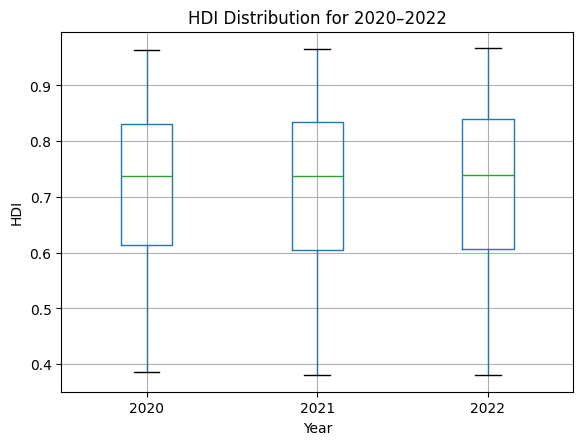


The impact of global events such as the COVID-19 pandemic on HDI trends is evident from the HDI distribution and trend charts. The box plot shows that in 2020, HDI values exhibit greater spread and a slightly lower median compared to subsequent years, indicating uneven impacts across countries. This reflects disruptions in health systems, economic activity, and education during the peak of the pandemic.

In 2021, the distribution begins to stabilize, with reduced variability and a marginal recovery in median HDI, suggesting partial adaptation through vaccination programs, economic stimulus measures, and digital access to education. By 2022, the median HDI increases further and the spread narrows, indicating recovery in many countries, although disparities remain.

The country-level line chart supports this observation, as several countries show stagnation or decline in 2020–2021 followed by gradual improvement in 2022. Overall, the charts suggest that COVID-19 caused a short-term setback in human development, with recovery patterns varying across countries depending on healthcare capacity and economic resilience.

problem 2

2. Composite Development Score:
• Create a new metric called Composite Score using the formula:
Composite Score = 0.30 × Life Expectancy Index + 0.30 × GNI per Capita Index}
Here: Life Expectancy Index → "life expectancy" and GNI per Capita Index → "gross inc percap"• Rank South Asian countries based on Composite Score.
• Plot the top 5 countries in a horizontal bar chart.
• Compare the ranking of countries by Composite Score with their HDI ranking and discuss any
differences.


In [ ]:
# Create a new metric called Composite Score
df_sa["Composite_Score"] = (
    0.30 * df_sa["life expectancy"] +
    0.30 * df_sa["gross inc percap"]
)

df_sa.sort_values("Composite_Score", ascending=False)


In [ ]:
# Filter for the latest year (2022) for a single country-level ranking
df_sa_2022 = df_sa[df_sa['year'] == 2022].copy()

# Ensure Composite_Score is calculated for the 2022 data
df_sa_2022["Composite_Score"] = (
    0.30 * df_sa_2022["life_expectancy"] +
    0.30 * df_sa_2022["gross_inc_percap"]
)

# Rank countries based on the 2022 Composite Score
composite_rank = df_sa_2022.sort_values("Composite_Score", ascending=False)[
    ["country", "Composite_Score", "hdi"]
]

composite_rank

In [ ]:
#PLOT TOP 5 COUNTRIES IN A HORIZONTAL BARCHART
top5 = composite_rank.head(5)

plt.figure()
plt.barh(top5["country"], top5["Composite_Score"])
plt.xlabel("Composite Score")
plt.ylabel("Country")
plt.title("Top 5 South Asian Countries by Composite Score (2022)")
plt.gca().invert_yaxis() # Invert y-axis to have the highest value at the top
plt.tight_layout() # Adjust layout to prevent labels from being cut off
plt.show()

In [ ]:
# Get HDI ranking for 2022 for South Asian countries
hdi_ranking = df_sa_2022.sort_values(by='hdi', ascending=False)[['country', 'hdi', 'Composite_Score']]

print("Ranking by Composite Score (Top 5):")
display(composite_rank.head())

print("\nRanking by HDI (Top 5):")
display(hdi_ranking.head())

print("\nFull Ranking by Composite Score:")
display(composite_rank)

print("\nFull Ranking by HDI:")
display(hdi_ranking)

### Comparison of Composite Score Ranking vs. HDI Ranking (2022)

Let's compare the rankings to identify any differences and discuss their implications.

*   **Maldives** consistently ranks first in both Composite Score and HDI, indicating its strong overall development and economic prosperity relative to other South Asian nations.

*   **Sri Lanka** maintains its second position in both rankings. This suggests that while GNI per capita heavily influences the Composite Score, Sri Lanka's life expectancy index aligns well with its overall HDI.

*   **Bhutan** ranks third by Composite Score, but `India` ranks third by HDI. Bhutan's higher Composite Score suggests that its GNI per capita might be relatively higher compared to India's for its life expectancy index, or India's HDI benefits more from other components (like education) that are not directly captured by this specific Composite Score formula.

*   **India** appears fourth by Composite Score and third by HDI, showing a slight discrepancy. This implies that factors beyond just life expectancy and GNI per capita (primarily education in the HDI) contribute significantly to India's HDI score.

*   **Bangladesh** ranks fifth by Composite Score, and its HDI ranking also places it in a similar position. This indicates a consistent performance across both metrics, suggesting that its economic and health indicators are in line with its overall human development.

*   **Pakistan** and **Nepal** show lower rankings in both, generally consistent. **Afghanistan** remains at the bottom, reflecting significant development challenges.

**Key Differences and Implications:**
The Composite Score, by focusing solely on Life Expectancy Index and GNI per Capita Index, might highlight countries with stronger economic and health outcomes more directly. The HDI, however, incorporates education indices (expected years of schooling and mean years of schooling) which can shift rankings for countries where educational attainment is particularly strong or weak relative to their economic and health status. The observed differences, particularly for Bhutan and India, underscore the importance of considering all dimensions of human development (health, education, and living standards) as measured by the HDI, rather than relying on a simplified composite metric. Countries performing better on the HDI but lower on the Composite Score might be excelling in education, while those with higher Composite Scores but lower HDI might need to focus more on educational development.

In [ ]:
#outlier detection
df_sa_copy = df_sa.copy() # Work on a copy to avoid SettingWithCopyWarning

# IQR for HDI
Q1_hdi = df_sa_copy["hdi"].quantile(0.25)
Q3_hdi = df_sa_copy["hdi"].quantile(0.75)
IQR_hdi = Q3_hdi - Q1_hdi

# IQR for GNI
Q1_gni = df_sa_copy["gross_inc_percap"].quantile(0.25)
Q3_gni = df_sa_copy["gross_inc_percap"].quantile(0.75)
IQR_gni = Q3_gni - Q1_gni

df_sa_copy["Outlier"] = (
    (df_sa_copy["hdi"] < Q1_hdi - 1.5 * IQR_hdi) |
    (df_sa_copy["hdi"] > Q3_hdi + 1.5 * IQR_hdi) |
    (df_sa_copy["gross_inc_percap"] < Q1_gni - 1.5 * IQR_gni) |
    (df_sa_copy["gross_inc_percap"] > Q3_gni + 1.5 * IQR_gni)
)
print(df_sa_copy["Outlier"].value_counts())

In summary, out of all the entries in your South Asia subset, 19 of them have been flagged as outliers for at least one of the two selected metrics.

In [ ]:
#Create a scatter plot of GNI per Capita vs HDI, highlighting the outliers in a different color.
plt.figure()
plt.scatter(df_sa_copy["gross_inc_percap"], df_sa_copy["hdi"], label='Normal Data')
plt.scatter(df_sa_copy[df_sa_copy["Outlier"]]["gross_inc_percap"],
            df_sa_copy[df_sa_copy["Outlier"]]["hdi"], color='red', label='Outliers')
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("GNI per Capita vs HDI (Outliers Highlighted)")
plt.legend()
plt.show()

 Discuss why the identified countries stand out as outliers.
 -Countries such as Maldives stand out as outliers due to exceptionally high GNI per capita relative to other South Asian nations. Afghanistan may appear as a low outlier due to low HDI and income levels. These outliers reflect economic imbalance and unique development paths.

4. Exploring Metric Relationships:

In [ ]:
# Pearson Correlation
print("Gender Development vs HDI:",
      df_sa["gender_development"].corr(df_sa["hdi"]))

print("Life Expectancy vs HDI:",
      df_sa["life_expectancy"].corr(df_sa["hdi"]))

Create scatter plots with trendlines to visualize the relationships.


In [ ]:
plt.figure()
x = df_sa["gender_development"]
y = df_sa["hdi"]

# Drop rows where either x or y is NaN before fitting the polynomial
combined = pd.DataFrame({'x': x, 'y': y}).dropna()
x_clean = combined['x']
y_clean = combined['y']

plt.scatter(x, y) # Plot all original data points

# Only fit the polynomial on clean data
plt.plot(x_clean, np.poly1d(np.polyfit(x_clean, y_clean, 1))(x_clean), color='red', label='Trendline')

plt.xlabel("Gender Development Index")
plt.ylabel("HDI")
plt.title("Gender Development vs HDI")
plt.legend()
plt.show()

In [ ]:
plt.figure()
x = df_sa["life_expectancy"]
y = df_sa["hdi"]

# Drop rows where either x or y is NaN before fitting the polynomial
combined = pd.DataFrame({'x': x, 'y': y}).dropna()
x_clean = combined['x']
y_clean = combined['y']

plt.scatter(x, y) # Plot all original data points

# Only fit the polynomial on clean data
plt.plot(x_clean, np.poly1d(np.polyfit(x_clean, y_clean, 1))(x_clean), color='red', label='Trendline')

plt.xlabel("Life Expectancy")
plt.ylabel("HDI")
plt.title("Life Expectancy vs HDI")
plt.legend()
plt.show()

DiscussionDiscuss:
– Which metric is most strongly related to HDI and shows the weakest relationship with HDI.


Life expectancy shows the strongest relationship with HDI, indicating health is a key contributor to human development. Gender development shows a weaker but still positive relationship, reflecting social inequality across countries.

5. Gap Analysis:Create a new metric:
GNI HDI Gap = "gross inc percap" − "hdi"
• Rank South Asian countries by GNI HDI Gap in descending and ascending order.
• Plot the top 3 positive gaps and top 3 negative gaps.
• Discuss the implications of the gap, e.g., cases where GNI is high but HDI is lower than expected.


In [ ]:
#metric creationand ranking  South Asian countries by GNI HDI Gap in descending and ascending order.
df_sa_gap_analysis = df_sa.copy() # Create a copy to avoid SettingWithCopyWarning
df_sa_gap_analysis["GNI_HDI_Gap"] = df_sa_gap_analysis["gross_inc_percap"] - df_sa_gap_analysis["hdi"]

gap_desc = df_sa_gap_analysis.sort_values("GNI_HDI_Gap", ascending=False)
gap_asc = df_sa_gap_analysis.sort_values("GNI_HDI_Gap", ascending=True)

print("Top Positive Gaps")
print(gap_desc[["country", "GNI_HDI_Gap"]].head(3))

print("Top Negative Gaps")
print(gap_asc[["country", "GNI_HDI_Gap"]].head(3))

Problem 3


In [ ]:

import seaborn as sns

# Load dataset
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/HDI_problem1B.csv")

# Check columns
df.columns


In [ ]:
#cretaing and saving subset
south_asia = [
    "Afghanistan", "Bangladesh", "Bhutan", "India",
    "Maldives", "Nepal", "Pakistan", "Sri Lanka"
]

middle_east = [
    "Bahrain", "Iran", "Iraq", "Israel", "Jordan",
    "Kuwait", "Lebanon", "Oman", "Palestine", "Qatar",
    "Saudi Arabia", "Syria", "United Arab Emirates", "Yemen"
]

df_sa = df[df["country"].isin(south_asia)]
df_me = df[df["country"].isin(middle_east)]

# Save CSVs
df_sa.to_csv("HDI_SouthAsia_2020_2022.csv", index=False)
df_me.to_csv("HDI_MiddleEast_2020_2022.csv", index=False)

print(df_sa.shape, df_me.shape)


In [ ]:
#. Descriptive Statistics (Mean & Std of HDI)
sa_mean = df_sa["hdi"].mean()
sa_std  = df_sa["hdi"].std()

me_mean = df_me["hdi"].mean()
me_std  = df_me["hdi"].std()

print("South Asia Mean HDI:", sa_mean)
print("South Asia Std HDI:", sa_std)

print("Middle East Mean HDI:", me_mean)
print("Middle East Std HDI:", me_std)


In [ ]:
#3. Top 3 & Bottom 3 Countries (HDI)
sa_avg = df_sa.groupby("country")["hdi"].mean().sort_values()
me_avg = df_me.groupby("country")["hdi"].mean().sort_values()

sa_top_bottom = pd.concat([sa_avg.head(3), sa_avg.tail(3)])
me_top_bottom = pd.concat([me_avg.head(3), me_avg.tail(3)])

# South Asia plot
plt.figure()
sa_top_bottom.plot(kind="bar")
plt.title("South Asia: Top & Bottom HDI Countries (2020–2022)")
plt.xlabel("Country")
plt.ylabel("Average HDI")
plt.show()

# Middle East plot
plt.figure()
me_top_bottom.plot(kind="bar")
plt.title("Middle East: Top & Bottom HDI Countries (2020–2022)")
plt.xlabel("Country")
plt.ylabel("Average HDI")
plt.show()

In [ ]:
metrics = ["gender_development", "life_expectancy", "gross_inc_percap"]

sa_metrics = df_sa[metrics].mean()
me_metrics = df_me[metrics].mean()

comparison_df = pd.DataFrame({
    "South Asia": sa_metrics,
    "Middle East": me_metrics
})

comparison_df.plot(kind="bar")
plt.title("Comparison of Development Metrics (2020–2022)")
plt.xlabel("Metric")
plt.ylabel("Average Value")
plt.xticks(rotation=0)
plt.show()

In [ ]:
#5. HDI Disparity (Range & Coefficient of Variation)
# Range
sa_range = df_sa["hdi"].max() - df_sa["hdi"].min()
me_range = df_me["hdi"].max() - df_me["hdi"].min()

# Coefficient of Variation
sa_cv = df_sa["hdi"].std() / df_sa["hdi"].mean()
me_cv = df_me["hdi"].std() / df_me["hdi"].mean()

print("South Asia HDI Range:", sa_range)
print("South Asia HDI CV:", sa_cv)

print("Middle East HDI Range:", me_range)
print("Middle East HDI CV:", me_cv)

In [ ]:
#6. Correlation Analysis (HDI vs Other Metrics)
#Correlation Values
print("South Asia Correlations")
print(df_sa[["hdi", "gender_development", "life_expectancy"]].corr())

print("\nMiddle East Correlations")
print(df_me[["hdi", "gender_development", "life_expectancy"]].corr())



In [ ]:
#Scatter Plots with Trendlines
# South Asia
sns.lmplot(data=df_sa, x="gender_development", y="hdi")
plt.title("South Asia: HDI vs Gender Development Index")
plt.show()

sns.lmplot(data=df_sa, x="life_expectancy", y="hdi")
plt.title("South Asia: HDI vs Life Expectancy")
plt.show()

# Middle East
sns.lmplot(data=df_me, x="gender_development", y="hdi")
plt.title("Middle East: HDI vs Gender Development Index")
plt.show()

sns.lmplot(data=df_me, x="life_expectancy", y="hdi")
plt.title("Middle East: HDI vs Life Expectancy")
plt.show()

In [ ]:
#7. Outlier Detection (1.5 × IQR Rule)
def detect_outliers(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Detect outliers
sa_outliers = detect_outliers(df_sa, "hdi")
me_outliers = detect_outliers(df_me, "hdi")

print("South Asia HDI Outliers")
print(sa_outliers[["country", "year", "hdi"]])

print("\nMiddle East HDI Outliers")
print(me_outliers[["country", "year", "hdi"]])

In [ ]:
#Outlier Scatter Plots
# South Asia
plt.figure()
plt.scatter(df_sa["gross_inc_percap"], df_sa["hdi"], label="Normal")
plt.scatter(sa_outliers["gross_inc_percap"], sa_outliers["hdi"], color='orange', label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("South Asia: HDI vs GNI (Outliers Highlighted)")
plt.legend()
plt.show()

# Middle East
plt.figure()
plt.scatter(df_me["gross_inc_percap"], df_me["hdi"], label="Normal")
plt.scatter(me_outliers["gross_inc_percap"], me_outliers["hdi"], color='orange', label="Outliers")
plt.xlabel("GNI per Capita")
plt.ylabel("HDI")
plt.title("Middle East: HDI vs GNI (Outliers Highlighted)")
plt.legend()
plt.show()